# Data Analysis Example

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn import datasets

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer

from matplotlib import pyplot as plt
import seaborn as sns

## Diabetes dataset

In [2]:
diabetes = datasets.load_diabetes()

### Description

In [3]:
print(diabetes.DESCR[23:])

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 10 feature variables hav

### Dataset

In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### OLS regression (first 4 cols)

In [5]:
est = smf.ols(formula='target ~ age + sex + bmi + bp', data=df).fit()
#est = sm.OLS(endog=df['target'], exog=sm.add_constant(df[df.columns[0:4]])).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           2.70e-47
Time:                        19:13:27   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.853     53.329      0.000     146.527     157.740
age           37.2412     64.117      0.581      0.562     -88.776     163.258
sex         -106.5775     62.125     -1.716      0.087    -228.679      15.524
bmi          787.1793     65.424     12.032      0.000     658.594     915.764
bp           416.6738     69.495      5.996      0.000     280.088     553.259
==============================================================================
Omnibus:                        9.858   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.464
Skew:                           0.146   Prob(JB):                       0.0395
Kurtosis:                       2.485   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Summary & Interpretation

**R-squared** tells us that about 40 % of the squared errors are modelled by our regression.

The column **t** here gives us the **t-statistic** values for the null-hypothesis that the individual coefficient is 0. This can actually be calculated simply by $t=\frac{\overline{X} - 0}{S} = \frac{\text{coef} - 0}{\text{stderr}}$, which we already see in the table, e.g. for age:

In [6]:
round(est.params['age']/est.bse['age'], 3)

0.581

**P>|t|** gives us the **p-value** for this hypothesis test (2-sided). A low p-value allows us to reject the null-hypothesis. We can actually calculate thes p-values from the cumulative distribution function of the t-statistic like this: (`2*` for 2 sided)

In [7]:
round(2*(1-stats.t.cdf(abs(est.tvalues['age']), df=est.df_resid)), 3)

0.562

Summarizing p-values close to 0 allow us to reject the null-hypotheses for a 0 coefficient. In our case this seems to be the case for bmi, blood pressure and the intercept with $p$ smaller than our (arbitrary) significance niveau $\alpha = 0.01$.

The null-hypothesis for a 0 coefficient for age and sex should however not be rejected, as  data at least as extreme as our sample could've occurred even with a 0 coefficient by chance with a probability of 56.2 % and 8.7 %.

#### Testing other hypotheses:

We can also test other hypotheses with the fitted model:

In [8]:
est.t_test('bmi = 0, sex = 0, bmi = 800, bmi = 2*bp')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           787.1793     65.424     12.032      0.000     658.594     915.764
c1          -106.5775     62.125     -1.716      0.087    -228.679      15.524
c2           787.1793     65.424     -0.196      0.845     658.594     915.764
c3           -46.1682    173.426     -0.266      0.790    -387.022     294.685

As expected, the first two rows are as above, as we used the same null-hypothesis of the coefficients being 0. In the first case, we should reject the null-hypothesis. In the second we should not reject the null-hypothesis, as under the assumption of a 0 coefficient, we would expect a 8.7% chance to see residual errors as ours.

The last two row shows the null-hypotheses that the coefficient for bmi is 800 or its influence twice that of bp. Both of these shouldn't be rejected, so we cannot exclude these possibilities.

#### Stargazer helper

In [9]:
Stargazer([est])

### Visualization

Despite all statistics, it's always a good idea to visualize the results, as oftentimes this allows you to quickly detect "systematic problems". Especially watch out for "one-sided-ness".

#### Fit-Plots

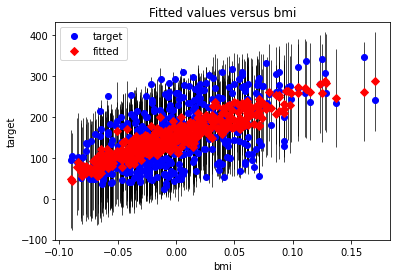

In [10]:
_ = sm.graphics.plot_fit(est, 'bmi')

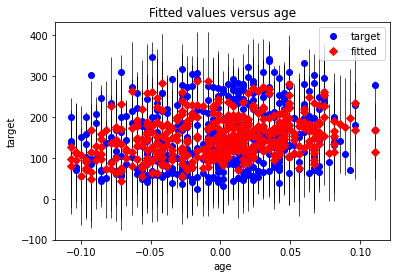

In [11]:
_ = sm.graphics.plot_fit(est, 'age')

##### Compare to a model only fitted on bmi:

In [12]:
smf.ols(formula='target ~ bmi', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           3.47e-42
Time:                        19:13:28   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

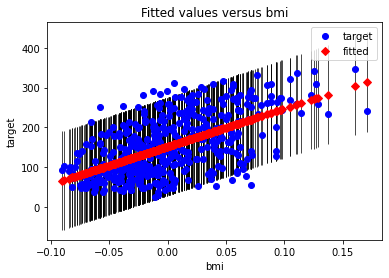

In [13]:
_ = sm.graphics.plot_fit(smf.ols(formula='target ~ bmi', data=df).fit(), 'bmi')

#### Partial Regression Plots

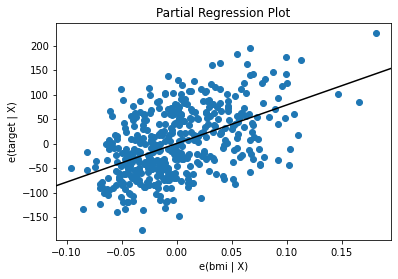

In [14]:
_ = sm.graphics.plot_partregress('target', 'bmi', ['age', 'sex', 'bp'], data=df, obs_labels=False)

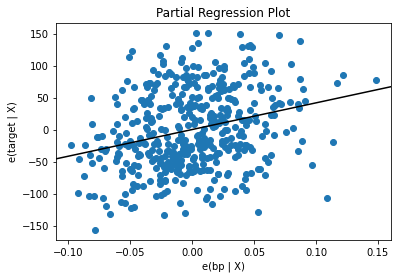

In [15]:
_ = sm.graphics.plot_partregress('target', 'bp', ['age', 'sex', 'bmi'], data=df, obs_labels=False)

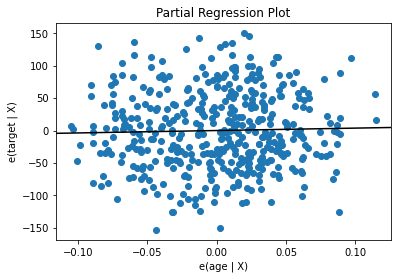

In [16]:
_ = sm.graphics.plot_partregress('target', 'age', ['bmi', 'sex', 'bp'], data=df, obs_labels=False)

#### Overview

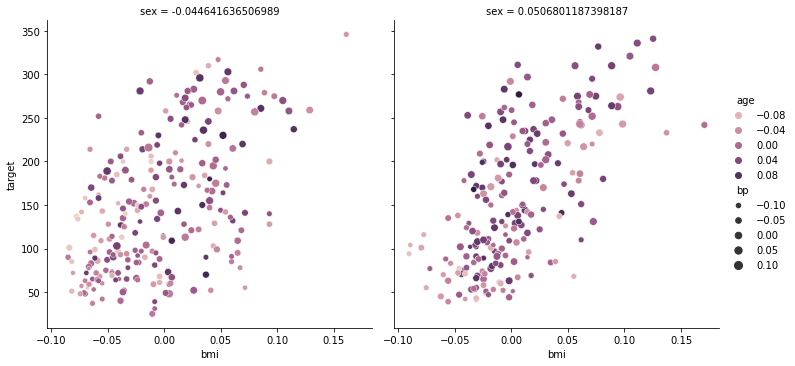

In [17]:
sns.relplot(data=df, x='bmi', y='target', size='bp', hue='age', col='sex')

### OLS regression (more columns)

In [18]:
est2 = sm.OLS(endog=df['target'], exog=sm.add_constant(df[df.columns[0:10]])).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           3.83e-62
Time:                        19:13:29   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
stargazer = Stargazer([est, est2])
stargazer

## Fitting non linear data with a linear model

In [20]:
x = np.arange(25)
y = .01*(x - 10)**3 + 42 + 5*np.random.rand(*x.shape)  # cubic data with some noise
df = pd.DataFrame({"x": x, "y": y})
df['xsqr'] = df['x']**2
df['xcube'] = df['x']**3

In [21]:
mod = smf.ols('y ~ x', data=df)
res = mod.fit()
#res.summary()

In [22]:
mod2 = smf.ols('y ~ x + xsqr', data=df)
res2 = mod2.fit()
#res2.summary()

In [23]:
mod3 = smf.ols('y ~ x + xsqr + xcube', data=df)
res3 = mod3.fit()
#res2.summary()

In [24]:
# summary_col([res,res2,res3], stars=True)
Stargazer([res,res2,res3])

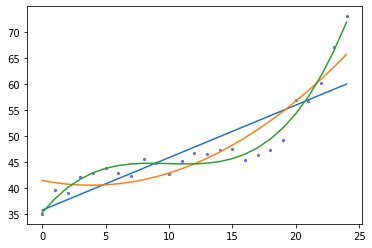

In [25]:
plt.scatter(x, y, alpha=.5, s=5, c='blue')
_x = np.sort(np.unique(x))
for r in [res, res2, res3]:
    def f(x):
        y = 0
        for p, w in enumerate(r.params):
            y += w * x**p
        return y
    plt.plot(_x, f(_x))